In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/restaurant-populationvsprofit/restaurant_profits_data.csv


**Problem Statement**

Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet.

* You would like to expand your business to cities that may give your restaurant higher profits.
* The chain already has restaurants in various cities and you have data for profits and populations from the cities.
* You also have data on cities that are candidates for a new restaurant.
 * For these cities, you have the city population.

Can you use the data to help you identify which cities may potentially give your business higher profits?

**Goal**

Our goal is to build a linear regression model to fit this data.

With this model, we can then input a new city's population, and have the model estimate restaurant's potential monthly profits for that city.

In [2]:
# Importing required Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy
import math

**Loading Data**

In [3]:
# Loading data from csv file
data = pd.read_csv('/kaggle/input/restaurant-populationvsprofit/restaurant_profits_data.csv')

# diplaying top 5 rows
data.head(5)

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
# Shape of data
data.shape

(98, 2)

In [5]:
data.describe()

,Population,Profit
count,98.000000,98.000000
mean,8.161173,5.781026
std,3.849908,5.511886
min,5.026900,-2.680700
25%,5.708450,1.883850
50%,6.735950,4.455300
75%,8.563225,6.990850
max,22.203000,24.147000


In [6]:
# checking missing values and duplicates
print(f'Missing Values in Data: \n{data.isnull().sum()}')
print(f'\nDuplicates in Data {data.duplicated().sum()}')

Missing Values in Data: 
Population    0
Profit        0
dtype: int64

Duplicates in Data 0


No missing values and duplicates found

In [7]:
# assign population to x_train and profits to y_train
x_train = data['Population']
y_train = data['Profit']

**View type and dimension of variables**

In [8]:
print("Type of x_train:",type(x_train))
print(f"\nTraining Feature's Shape: {x_train.shape}\n")
print(f'Top 5 records: \n\n{x_train[:5]}')

Type of x_train: <class 'pandas.core.series.Series'>

Training Feature's Shape: (98,)

Top 5 records: 

0    6.1101
1    5.5277
2    8.5186
3    7.0032
4    5.8598
Name: Population, dtype: float64


In [9]:
print("Type of x_train:",type(y_train))
print(f"\nLabels' Shape: {y_train.shape}\n")
print(f'Top 5 labels: \n\n{y_train[:5]}')

Type of x_train: <class 'pandas.core.series.Series'>

Labels' Shape: (98,)

Top 5 labels: 

0    17.5920
1     9.1302
2    13.6620
3    11.8540
4     6.8233
Name: Profit, dtype: float64


**Data Visualization**

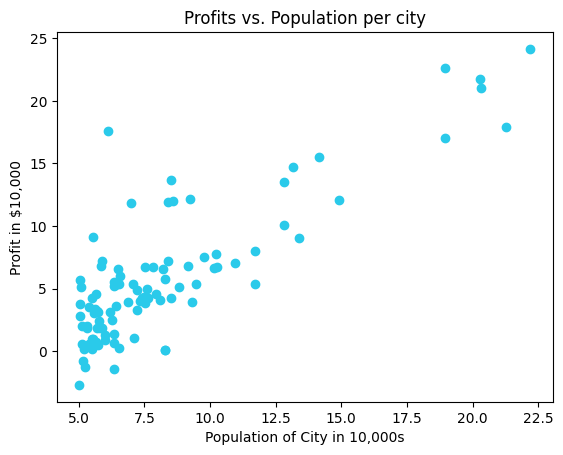

In [10]:
# Creating a scatter plot of the data. 
plt.scatter(x_train, y_train, marker='o', c='#2ACAEA') 

# Set the title
plt.title("Profits vs. Population per city")
# Set the y-axis label
plt.ylabel('Profit in $10,000')
# Set the x-axis label
plt.xlabel('Population of City in 10,000s')
plt.show()

**Computing Cost** for Linear Regression for this data

In [11]:
def compute_cost(x, y, w, b): 
    """
    Computes the cost function for linear regression.
    
    Args:
        x (ndarray): Shape (m,) Input to the model (Population of cities) 
        y (ndarray): Shape (m,) Label (Actual profits for the cities)
        w, b (scalar): Parameters of the model
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0] 
    
    total_cost = 0
    
    for i in range(m):                                
        f_wb_i = np.dot(x[i], w) + b           #(n,)(n,) = scalar (see np.dot)
        total_cost = total_cost + (f_wb_i - y[i])**2       #scalar
    total_cost = total_cost / (2 * m)                      #scalar    
  
    return total_cost

In [12]:
# Compute cost with some initial values for paramaters w, b
initial_w = 2
initial_b = 1

cost = compute_cost(x_train, y_train, initial_w, initial_b)
print(type(cost))
print(f'\nCost at initial w: {cost:.3f}')

<class 'numpy.float64'>

Cost at initial w: 75.989


**Compute Gradient Descent**

In [13]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray): Shape (m,) Input to the model (Population of cities) 
      y (ndarray): Shape (m,) Label (Actual profits for the cities)
      w, b (scalar): Parameters of the model  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]
    n = y.shape[0]
    
    dj_dw = 0
    dj_db = 0

    for i in range(m):                             
      # to get prediction f_wb for the ith example
        f_wb = np.dot(x[i], w) + b
        
        err = (np.dot(x[i], w) + b) - y[i] 
       # to get the gradient for w from the ith example 
        for j in range(n): 
            dj_dw_i = err * x[i] 

       # to get the gradient for b from the ith example 
        dj_db_i = err

       # Update dj_db : In Python, a += 1  is the same as a = a + 1
        dj_db += dj_db_i

       # Update dj_dw
        dj_dw += dj_dw_i    
        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m
        
    return dj_dw, dj_db

In [14]:
# Compute and display gradient with w initialized to zeroes
initial_w = 0
initial_b = 0

tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, initial_w, initial_b)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)

Gradient at initial w, b (zeros): -64.67445375974492 -5.781025918367345


In [15]:
# Compute and display cost and gradient with non-zero w
test_w = 0.2
test_b = 0.2
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, test_w, test_b)

print('Gradient at test w, b:', tmp_dj_dw, tmp_dj_db)

Gradient at test w, b: -46.78715881056124 -3.948791224489795


**Learning parameters using batch gradient descent:**
find the optimal parameters of a linear regression model by using batch gradient descent

In [16]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x :    (ndarray): Shape (m,)
      y :    (ndarray): Shape (m,)
      w_in, b_in : (scalar) Initial values of parameters of the model
      cost_function: function to compute cost
      gradient_function: function to compute the gradient
      alpha : (float) Learning rate
      num_iters : (int) number of iterations to run gradient descent
    Returns
      w : (ndarray): Shape (1,) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    
    # number of training examples
    m = len(x)
    
    # An array to store cost J and w's at each iteration — primarily for graphing later
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_dw, dj_db = gradient_function(x, y, w, b )  

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w, b, J_history, w_history #return w and J,w history for graphing

Now let's run the gradient descent algorithm above to learn the parameters for our dataset

In [17]:
# initialize fitting parameters. Recall that the shape of w is (n,)
initial_w = 0.
initial_b = 0.

# some gradient descent settings
iterations = 1500
alpha = 0.01

w,b,_,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                     compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost     6.89   
Iteration  150: Cost     5.46   
Iteration  300: Cost     5.10   
Iteration  450: Cost     4.90   
Iteration  600: Cost     4.78   
Iteration  750: Cost     4.70   
Iteration  900: Cost     4.66   
Iteration 1050: Cost     4.64   
Iteration 1200: Cost     4.62   
Iteration 1350: Cost     4.62   
w,b found by gradient descent: 1.1647624823368783 -3.675564926897907


**Plot Linear Fit**

We will now use the final parameters from gradient descent to plot the linear fit i.e w =  1.1647624823368783, b = -3.675564926897907

In [18]:
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x_train[i] + b

Text(0.5, 0, 'Population of City in 10,000s')

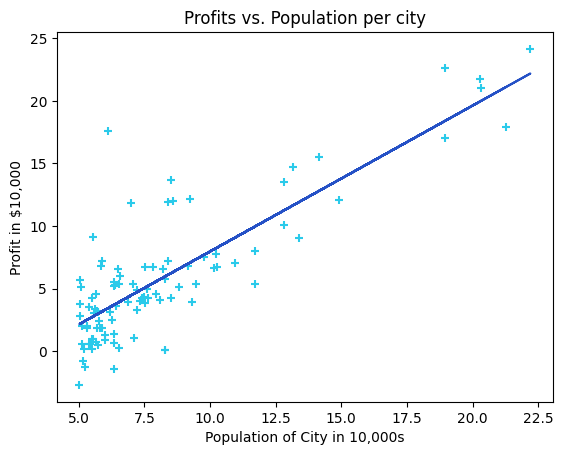

In [19]:
# Plot the linear fit
plt.plot(x_train, predicted, c = '#2551C6')

# Create a scatter plot of the data. 
plt.scatter(x_train, y_train, marker='+', c='#2ACAEA') 

# Set the title
plt.title("Profits vs. Population per city")
# Set the y-axis label
plt.ylabel('Profit in $10,000')
# Set the x-axis label
plt.xlabel('Population of City in 10,000s')

Let's predict what the profit would be in areas of 34,000 and 72,000 people.


* The model takes in population of a city in 10,000s as input.

* Therefore, 34,000 people can be translated into an input to the model as np.array([3.4])

Similarly, 72,000 people can be translated into an input to the model as np.array([7.2])

In [20]:
predict1 = 3.4 * w + b
print('For population = 34,000, we predict a profit of $%.2f' % (predict1*10000))

predict2 = 7.2 * w + b
print('For population = 72,000, we predict a profit of $%.2f' % (predict2*10000))

For population = 34,000, we predict a profit of $2846.28
For population = 72,000, we predict a profit of $47107.25
